In [6]:
import os
import uuid
import shutil
#import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
#from pylatex.section import Chapter, Subsection
#from pylatex import Document, Section, Figure, NoEscape, Command

%run pipeline_mod.ipynb

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [7]:
coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score1':'Int64','Flare1':'Int64',
          'Shelf1':'Int64','Evolution1':'Int64','Score2':'Int64','Flare2':'Int64','Shelf2':'Int64','Evolution2':'Int64'}

In [8]:
lclist=pd.read_csv('lcscoresandchecker.csv',dtype=coltypes)

In [9]:
def triple_lc(pop_id,sectors,period): #sectors must be a list of three sectors
    row1=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[0])]
    row1name=row1.lcname.values[0]
    lc1=get_lc_string(row1name)
    if row1.LC_author.values[0]=='FFI':
        lc1.flux=lc1.flux#+1
    else:
        lc1=lc1.normalize()

    row2=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[1])]
    row2name=row2.lcname.values[0]
    lc2=get_lc_string(row2name)
    if row2.LC_author.values[0]=='FFI':
        lc2.flux=lc2.flux#+1
    else:
        lc2=lc2.normalize()

    row3=lclist[np.logical_and(lclist.pop_id==pop_id,lclist.secorcamp==sectors[2])]
    row3name=row3.lcname.values[0]
    lc3=get_lc_string(row3name)
    #if row3.LC_author.values[0]=='FFI':
        #lc3.flux=lc3.flux#+1
    #else:
    lc3=lc3.normalize()

    if period==1: #this tells you to use the first period vs the second in the data table
        period=u.Quantity(row1.per.values[0],u.d)
    else:
        period=u.Quantity(row1.per2.values[0],u.d)
    bintime=u.Quantity(period/200,u.s)
    
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
    subgraph_phaselc(lc1,period=period,ax=ax1,bintime=bintime,showperiod=False)
    subgraph_phaselc(lc2,period=period,ax=ax2,bintime=bintime,showperiod=False)
    subgraph_phaselc(lc3,period=period,ax=ax3,bintime=bintime,showperiod=False)
    
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax3.set_ylabel('')
    ax1.set_xlabel('')
    ax2.set_xlabel('')
    ax3.set_xlabel('')
    
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    ax3.set_xticklabels([])
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax1.tick_params(direction='in')
    ax2.tick_params(direction='in')
    ax3.tick_params(direction='in')
    plt.subplots_adjust(wspace=0)
    ax1.set_title(f'Sector {row1.secorcamp.values[0]}')
    ax2.set_title(f'Sector {row2.secorcamp.values[0]}')
    ax3.set_title(f'Sector {row3.secorcamp.values[0]}')
    #fig.suptitle(f'{pop_id}, TIC {k2row.TIC.values[0]}, {period}',y=0.94)
    fig.suptitle(f'TIC {row1.TIC.values[0]}, {period}')
    #fig.savefig(f'multiplots/comparison/{pop_id}.png',bbox_inches='tight')
    return fig

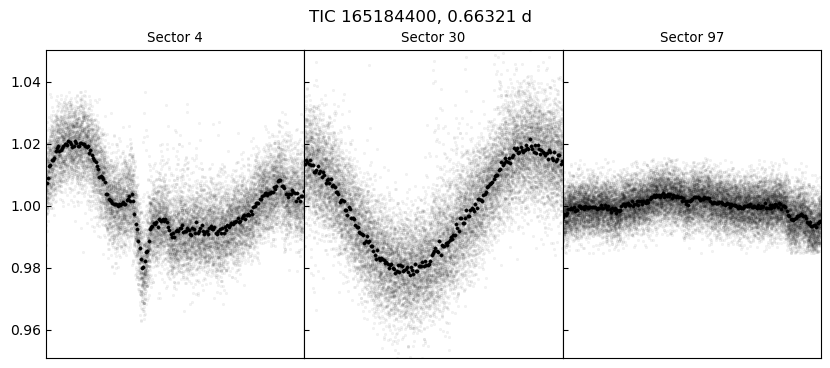

In [10]:
triple_lc(75,(4,30,97),1)

In [11]:
#triple_lc(202,(30,69,96),1)

In [12]:
#triple_lc(207,(31,32,97),1)

In [13]:
#triple_lc(208,(32,43,70),2)

['./data/tess-s0070-4-4_68.074470_24.370838_50x50_astrocut.fits']
Removing 1003 bad data points (out of 10730) using the TESS provided QUALITY array
[[[ 1.5944929  1.5832648  1.6037533 ...  1.6272969  1.5790462  1.543283 ]
  [ 1.5856757  1.6026883  1.6004441 ...  1.6503172  1.6094704  1.5848329]
  [ 1.5708606  1.5921557  1.6083965 ...  1.6724901  1.6032126  1.616015 ]
  ...
  [ 1.486093   1.5144615  1.5761852 ...  1.6745603  1.6617646  1.6401944]
  [ 1.5572679  1.6043007  1.6003125 ...  1.6946948  1.6651726  1.6517968]
  [ 1.6006141  1.6222649  1.6053035 ...  1.6876729  1.656215   1.6402678]]

 [[ 1.5606718  1.5634818  1.5855362 ...  1.617717   1.5544395  1.535567 ]
  [ 1.5761647  1.5666335  1.5581384 ...  1.6240823  1.5683084  1.5769668]
  [ 1.5775967  1.5967598  1.5820444 ...  1.6293693  1.594733   1.6245971]
  ...
  [ 1.4772804  1.5033467  1.5350823 ...  1.6568325  1.636739   1.6487215]
  [ 1.5402763  1.5607634  1.5823965 ...  1.6685965  1.664809   1.627527 ]
  [ 1.6072795  1.60236 

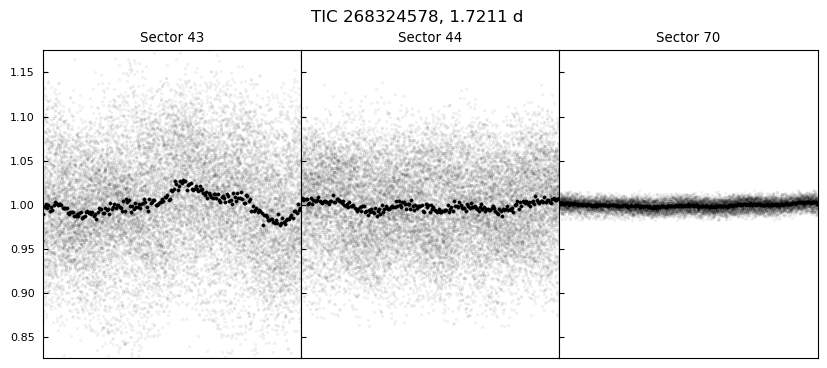

In [14]:
triple_lc(211,(43,44,70),1)

In [15]:
#triple_lc(133,(12,39,91),1)

In [16]:
#triple_lc(211,(43,44,70),1)